In [18]:
# adp 15회 전력사용량 
# usage.csv 
# timestamp 컬럼 (timestamp별 전력사용량) - 15분 간격으로 측정된 자료 (900씩 증가 - 초단위)
# usage 컬럼 - 방금 15분동안 사용된 전력
# usage_history.csv 데이터 (약 100000*7개 hh:mm, A/B/C/D/E)
# weather.csv 데이터 (약 600*2개 yyyymmdd. 평균기온)

# 위의 3개 데이터를 date 기준으로 병합 yyyy-mm-dd/A/B/C/D/E/사용량
# 요일변수 생성 및 A/B/C/D/E 별 평균 사용량 + 그래프 
# 요일간 사용량 분석 및 가장 차이있는 요일 도출


# adp 20회 가구별 15분단위 전력사용량 
# 연/월/일/시간/가구코드
# 클러스터링 - 가구별 15분 단위로 전력사용량 합계 산출, 군집화하고 표 작성
# 히트맵 시각화 - 그룹별로 15분마다 전력사용량 요일별 평균 시각화

In [2]:
# kogas 사용량데이터 활용
# -> 가구별? 1시간당 사용량 으로 20회 문제에 적용
#    + 요일변수 생성 및 type별 평균 사용량 + 그래프 
#    + 요일간 사용량 분석 및 가장 차이있는 요일 도출


import pandas as pd

a = pd.read_csv('data/KOGAS_20181231.csv', encoding='CP949')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [3]:
a.columns = ['date','hour','type','usage']

In [4]:
a.head()

,date,hour,type,usage
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [6]:
a.tail() 

,date,hour,type,usage
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953
368087,2018-12-31,24,H,560.896


In [5]:
a.type.value_counts()

A    52584
B    52584
C    52584
D    52584
E    52584
G    52584
H    52584
Name: type, dtype: int64

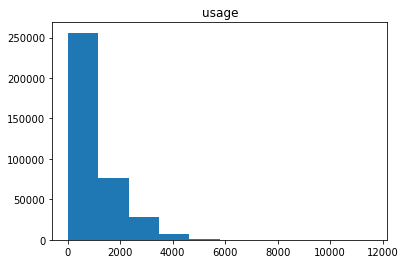

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for v in a.select_dtypes(include='float64'):
    target = a[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

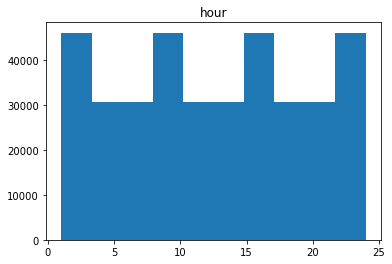

In [22]:
for v in a.select_dtypes(include='int64'):
    target = a[v]
    plt.hist(target)
    plt.title(v)
    plt.show()

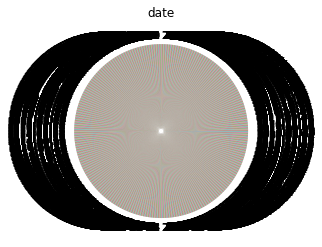

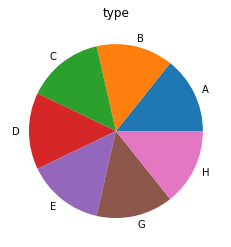

In [23]:
for v in a.select_dtypes(include='object'):
    target = a[v].value_counts()
    plt.pie(target.values, labels=target.index)
    plt.title(v)
    plt.show()

In [10]:
### date는 2013년 1월 1일 1시부터 2018년 12월 31일 24시까지
### date와 시간을 합쳐서 파생변수 생성
import pandas as pd

dt = pd.date_range('2013-01-01','2018-12-31', freq='1h')
dt

# a.info()에는 전체 368088 행이라고 나오는데 날짜는 왜 52561개 밖에 안됨?

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2018-12-30 15:00:00', '2018-12-30 16:00:00',
               '2018-12-30 17:00:00', '2018-12-30 18:00:00',
               '2018-12-30 19:00:00', '2018-12-30 20:00:00',
               '2018-12-30 21:00:00', '2018-12-30 22:00:00',
               '2018-12-30 23:00:00', '2018-12-31 00:00:00'],
              dtype='datetime64[ns]', length=52561, freq='H')

In [13]:
368088/7 # -> type갯수로 나누면 날짜는 52584 개가 되어야 함  ㅇㅁㅇ;;;


52584.0

In [85]:
### hour를 str로 바꾸고 date랑 합치는 식으로 가야하나?
### pd.to_datetime 에서는 0시부터 23시까지의 설정인데 
### 이 데이터에서는 1시부터 24시까지로 되어있음
### 한시간씩 빼서 합친 후에 1시간씩 늦춘 시간대로 최종확정해야함
a_ = a.copy()
a_['hour-1'] = a_['hour']-1
a_['hour-1'] = a_['hour-1'].astype(str)

In [86]:
a_['datetime-1h'] = a_['date'] + ' ' + a_['hour-1']+":00:00"
a_.head()

,date,hour,type,usage,hour-1,datetime-1h
0,2013-01-01,1,A,2497.129,0,2013-01-01 0:00:00
1,2013-01-01,2,A,2363.265,1,2013-01-01 1:00:00
2,2013-01-01,3,A,2258.505,2,2013-01-01 2:00:00
3,2013-01-01,4,A,2243.969,3,2013-01-01 3:00:00
4,2013-01-01,5,A,2344.105,4,2013-01-01 4:00:00


In [87]:
a_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         368088 non-null  object 
 1   hour         368088 non-null  int64  
 2   type         368088 non-null  object 
 3   usage        368088 non-null  float64
 4   hour-1       368088 non-null  object 
 5   datetime-1h  368088 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.8+ MB


In [88]:
# str -> datetime 변수형태로 변환

a_['dt'] = pd.to_datetime(a_['datetime-1h'], format='%Y-%m-%d %H:%M:%S')

In [89]:
# 1시간 뒤의 시간대로 datetime을 확정
from datetime import timedelta, datetime

a_['datetime'] = a_['dt'] + timedelta(hours=1)
a_.head(25)

,date,hour,type,usage,hour-1,datetime-1h,dt,datetime
0,2013-01-01,1,A,2497.129,0,2013-01-01 0:00:00,2013-01-01 00:00:00,2013-01-01 01:00:00
1,2013-01-01,2,A,2363.265,1,2013-01-01 1:00:00,2013-01-01 01:00:00,2013-01-01 02:00:00
2,2013-01-01,3,A,2258.505,2,2013-01-01 2:00:00,2013-01-01 02:00:00,2013-01-01 03:00:00
3,2013-01-01,4,A,2243.969,3,2013-01-01 3:00:00,2013-01-01 03:00:00,2013-01-01 04:00:00
4,2013-01-01,5,A,2344.105,4,2013-01-01 4:00:00,2013-01-01 04:00:00,2013-01-01 05:00:00
5,2013-01-01,6,A,2390.961,5,2013-01-01 5:00:00,2013-01-01 05:00:00,2013-01-01 06:00:00
6,2013-01-01,7,A,2378.457,6,2013-01-01 6:00:00,2013-01-01 06:00:00,2013-01-01 07:00:00
7,2013-01-01,8,A,2518.921,7,2013-01-01 7:00:00,2013-01-01 07:00:00,2013-01-01 08:00:00
8,2013-01-01,9,A,2706.481,8,2013-01-01 8:00:00,2013-01-01 08:00:00,2013-01-01 09:00:00
9,2013-01-01,10,A,2832.057,9,2013-01-01 9:00:00,2013-01-01 09:00:00,2013-01-01 10:00:00


In [122]:
# 클러스터링 - 가구별 1h 단위로 전력사용량 합계 산출, 군집화하고 표 작성
df = a_.copy()
df = df.reset_index()

columns_cl = ['index','datetime','type','usage']
df = df[columns_cl]
df.rename(columns={'index': 'house_code'}, inplace=True)
df


,house_code,datetime,type,usage
0,0,2013-01-01 01:00:00,A,2497.129
1,1,2013-01-01 02:00:00,A,2363.265
2,2,2013-01-01 03:00:00,A,2258.505
3,3,2013-01-01 04:00:00,A,2243.969
4,4,2013-01-01 05:00:00,A,2344.105
...,...,...,...,...
368083,368083,2018-12-31 20:00:00,H,681.033
368084,368084,2018-12-31 21:00:00,H,669.961
368085,368085,2018-12-31 22:00:00,H,657.941
368086,368086,2018-12-31 23:00:00,H,610.953


In [171]:
# 히트맵 시각화 - 그룹별로 15분마다 전력사용량 요일별 평균 시각화

dttt = pd.to_datetime(a_['date'])
df['weekdays'] = dttt.dt.weekday # 0 = 월요일, 1= 화요일, ..... 6=일요일

map_wdays={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}
df['wdays'] = df['weekdays'].map(map_wdays)

df['hour'] = a_['hour']

df.head()

,house_code,datetime,type,usage,weekdays,wdays,hour
0,0,2013-01-01 01:00:00,A,2497.129,1,tue,1
1,1,2013-01-01 02:00:00,A,2363.265,1,tue,2
2,2,2013-01-01 03:00:00,A,2258.505,1,tue,3
3,3,2013-01-01 04:00:00,A,2243.969,1,tue,4
4,4,2013-01-01 05:00:00,A,2344.105,1,tue,5


In [172]:
df.pivot_table(index='wdays', columns='hour', values='usage', aggfunc='sum') 

hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
wdays,,,,,,,,,,,,,,,,,,,,,
fri,1878547.440,1559040.580,1395761.068,1438228.626,1635086.163,1818654.559,2253204.373,2778791.596,2745280.466,2586202.483,...,2001900.440,1932131.653,1975299.355,2156854.371,2420884.525,2516595.186,2466977.679,2372338.448,2247908.970,2113943.724
mon,1603959.790,1325010.274,1213660.811,1277477.491,1488701.175,1703078.610,2185794.559,2726534.970,2701400.426,2553685.225,...,2003411.919,1932606.671,1974909.316,2168537.740,2463898.582,2582343.792,2548560.619,2475692.715,2289830.709,2106667.748
sat,1880175.993,1582935.277,1396942.514,1416076.254,1576260.614,1674456.984,1842771.921,2177698.137,2391731.560,2424227.129,...,1844256.795,1786098.319,1823833.048,2008989.224,2257247.380,2274855.015,2197758.157,2086566.529,1991553.327,1887711.484
sun,1702958.309,1435439.625,1281530.758,1304980.578,1447970.079,1508885.015,1639339.285,1931525.780,2174173.754,2252867.359,...,1740254.869,1703324.463,1769566.118,1991945.766,2264263.867,2312260.672,2248870.174,2133583.675,1990254.117,1852682.051
thu,1856923.688,1537552.966,1376724.792,1420598.081,1617609.135,1804650.724,2252206.535,2779897.443,2744288.666,2582579.185,...,2005633.219,1938408.821,1990395.622,2192341.192,2487333.951,2602039.722,2565726.025,2496490.200,2334136.567,2159852.107
tue,1821149.666,1513034.493,1358884.808,1403785.729,1602334.758,1787779.558,2241850.796,2776359.216,2737380.728,2575352.557,...,1996763.838,1930534.100,1981548.159,2191617.119,2491281.824,2602602.399,2566418.940,2501428.754,2321370.678,2142739.656
wed,1852342.300,1528189.470,1367749.933,1411042.542,1607068.420,1790404.443,2238297.616,2771403.697,2730286.042,2566028.507,...,1991162.782,1923435.439,1974224.927,2180361.655,2474900.956,2581695.712,2549170.258,2491328.565,2336461.726,2144764.035


AttributeError: 'DataFrame' object has no attribute 'hour'

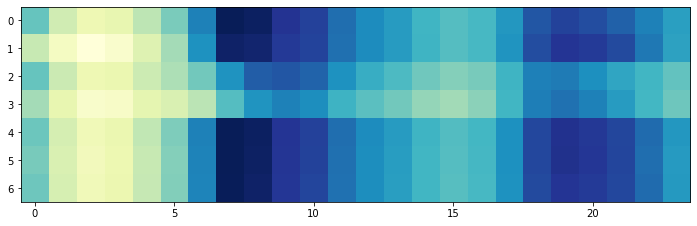

In [173]:
# 히트맵 시각화
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_heatmap = df.pivot_table(index='wdays', columns='hour', values='usage', aggfunc='sum') 


plt.figure(figsize = (12, 9))
plt.imshow(df_heatmap, cmap = 'YlGnBu')
plt.xticks(range(len(df_heatmap)), df_heatmap.hour, rotation = 20)
plt.yticks(range(len(df_heatmap)), df_heatmap.wdays, rotation = 20)
plt.colorbar()
plt.show()


In [151]:
# type(A~H) 가 가구코드였나? 아닌거같은데 가구코드 재현불가능 -_-;;;

df_ = df.copy()
df_n = df_.drop('house_code', axis=1)

grouped = df_n.groupby(['type','datetime'])

gdsum = grouped['usage'].sum()
gdsum_df = pd.DataFrame(gdsum)
gdsum_df = gdsum_df.reset_index()
gdsum_df.columns = ['type','datetime','Total_P']


In [152]:
gdsum_df

,type,datetime,Total_P
0,A,2013-01-01 01:00:00,2497.129
1,A,2013-01-01 02:00:00,2363.265
2,A,2013-01-01 03:00:00,2258.505
3,A,2013-01-01 04:00:00,2243.969
4,A,2013-01-01 05:00:00,2344.105
...,...,...,...
368083,H,2018-12-31 20:00:00,681.033
368084,H,2018-12-31 21:00:00,669.961
368085,H,2018-12-31 22:00:00,657.941
368086,H,2018-12-31 23:00:00,610.953


In [185]:
# 가구별 usage 평균/합계/ 최소 / 최대값
df_clust = df_.groupby(['type']).agg(['mean','sum','min','max'])['usage']
df_clust.reset_index()
df_clust

C:\Users\getou\AppData\Local\Temp/ipykernel_24016/3655207710.py:2: FutureWarning: ['datetime', 'wdays'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_clust = df_.groupby(['type']).agg(['mean','sum','min','max'])['usage']


,mean,sum,min,max
type,,,,
A,1167.014483,6.136629e+07,114.097,11593.617
B,958.564621,5.040516e+07,67.973,3798.613
C,131.585481,6.919291e+06,1.378,358.654
D,664.626452,3.494872e+07,36.196,2377.584
E,1395.356673,7.337344e+07,108.101,5301.451
G,2070.685900,1.088849e+08,355.413,10271.437
H,248.866646,1.308640e+07,2.756,6644.788


In [194]:
# 클러스터링 - KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
gdsum_df_sc = sc.fit_transform(gdsum_df[['Total_P']])

km = KMeans(n_clusters=4, random_state=999)
clusters= km.fit(gdsum_df_sc)

gdsum_df['cluster']=clusters.labels_  # 분류된 클러스터 라벨을 컬럼으로 추가
print(gdsum_df['cluster'].unique())
gdsum_df

[3 1 0 2]


,type,datetime,Total_P,cluster
0,A,2013-01-01 01:00:00,2497.129,3
1,A,2013-01-01 02:00:00,2363.265,3
2,A,2013-01-01 03:00:00,2258.505,3
3,A,2013-01-01 04:00:00,2243.969,3
4,A,2013-01-01 05:00:00,2344.105,3
...,...,...,...,...
368083,H,2018-12-31 20:00:00,681.033,0
368084,H,2018-12-31 21:00:00,669.961,0
368085,H,2018-12-31 22:00:00,657.941,0
368086,H,2018-12-31 23:00:00,610.953,0


In [195]:
gdsum_df['cluster'].value_counts()

2    175668
0    102389
3     64426
1     25605
Name: cluster, dtype: int64

In [ ]:
# tSNE로 차원축소 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0)
x=tsne.fit_transform(gdsum_df[['Total_P']])

tsne_df = pd.DataFrame(x)
tsne_df['cluster(tSNE)'] = gdsum_df['cluster']
tsne_df.columns = ['axis_0', 'axis_1','cluster(tSNE)']
tsne_df.head()

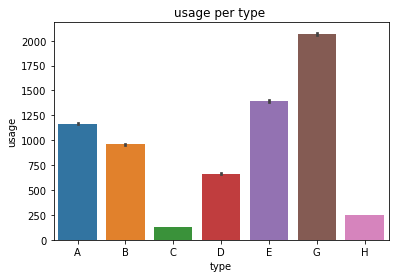

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

#  type별 평균 사용량 + 그래프 

sns.barplot(x="type", y="usage", data=df)
plt.title("usages per type ")
plt.show()


In [160]:
# type별 평균 사용량

df.pivot_table(index='type', values='usage')

,usage
type,
A,1167.014483
B,958.564621
C,131.585481
D,664.626452
E,1395.356673
G,2070.685900
H,248.866646


In [158]:
# types 일원분류 분산분석

import statsmodels.api as sm
import statsmodels.formula.api as smf

a_fit = smf.ols(formula='usage~type', data=df).fit()

# 결과표 출력
sm.stats.anova_lm(a_fit, typ=3) 
#p<0.01 이므로 type에 따른 유의한 차이

,sum_sq,df,F,PR(>F)
Intercept,7.161535e+10,1.0,153125.029217,0.0
type,1.443037e+11,6.0,51424.053109,0.0
Residual,1.721485e+11,368081.0,NaN,NaN


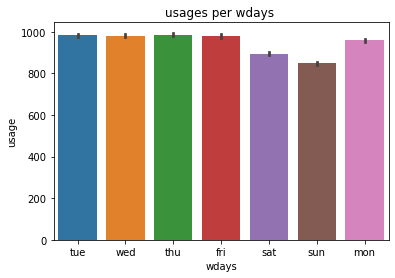

In [161]:


# 요일간 사용량 분석 및 가장 차이있는 요일 도출
sns.barplot(x="wdays", y="usage", data=df)
plt.title("usages per wdays ")
plt.show()



In [155]:
# wdays 일원분류 분산분석

import statsmodels.api as sm
import statsmodels.formula.api as smf

a_fit = smf.ols(formula='usage~wdays', data=df).fit()

# 결과표 출력
sm.stats.anova_lm(a_fit, typ=3) 
#p<0.01 이므로 wdays에 따른 유의한 차이 

,sum_sq,df,F,PR(>F)
Intercept,5.040258e+10,1.0,58797.972994,0.000000e+00
wdays,9.272366e+08,6.0,180.280586,4.207627e-230
Residual,3.155250e+11,368081.0,NaN,NaN


In [156]:
# 사후분석
#  본페로니 검정
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['usage'],df['wdays'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
fri,mon,-18.7902,0.0173,-35.6249,-1.9555,True
fri,sat,-83.8897,0.001,-100.7244,-67.055,True
fri,sun,-129.7802,0.001,-146.6149,-112.9455,True
fri,thu,8.4801,0.7262,-8.3546,25.3148,False
fri,tue,4.2953,0.9,-12.5394,21.13,False
fri,wed,3.1188,0.9,-13.7159,19.9535,False
mon,sat,-65.0995,0.001,-81.9342,-48.2648,True
mon,sun,-110.9901,0.001,-127.8248,-94.1554,True
mon,thu,27.2702,0.001,10.4355,44.1049,True
mon,tue,23.0855,0.001,6.2508,39.9202,True


In [24]:
### energy - 태양광 관련 데이터 

import pandas as pd

b = pd.read_csv('data/energy.csv', encoding='CP949')
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB
